# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

__Описание данных__

Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
      
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота

Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")

## Подготовка данных

### Изучение данных

In [2]:
df = pd.read_csv('')
dTrain = pd.read_csv('')
dTest = pd.read_csv('')

In [3]:
display(df.head(3))
display(df.describe())
df.info()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


В датесете присутствуют некоторые пропуски, а также имеется колонка с данными дат объектного типа.

### Анализ признаков, недоступных в тестовой выборке

In [4]:
dTest

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [5]:
set(dTrain.columns) - set(dTest.columns) 

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют колонки с параметром продукта - output, так как это целевые признаки, а также расчетных характеристик - calculation, скорее всего эти признаки расчитываются позднее.

### Предобработка данных

#### Пропуски

In [6]:
df = df.fillna(method='ffill')
dTrain= dTrain.fillna(method='ffill')
dTest = dTest.fillna(method='ffill')

#### Аномалии

Далее визуализированы аномальные значения, которые будут удалены в процессе анализа для более точного обучения модели.

(0.0, 400.0)

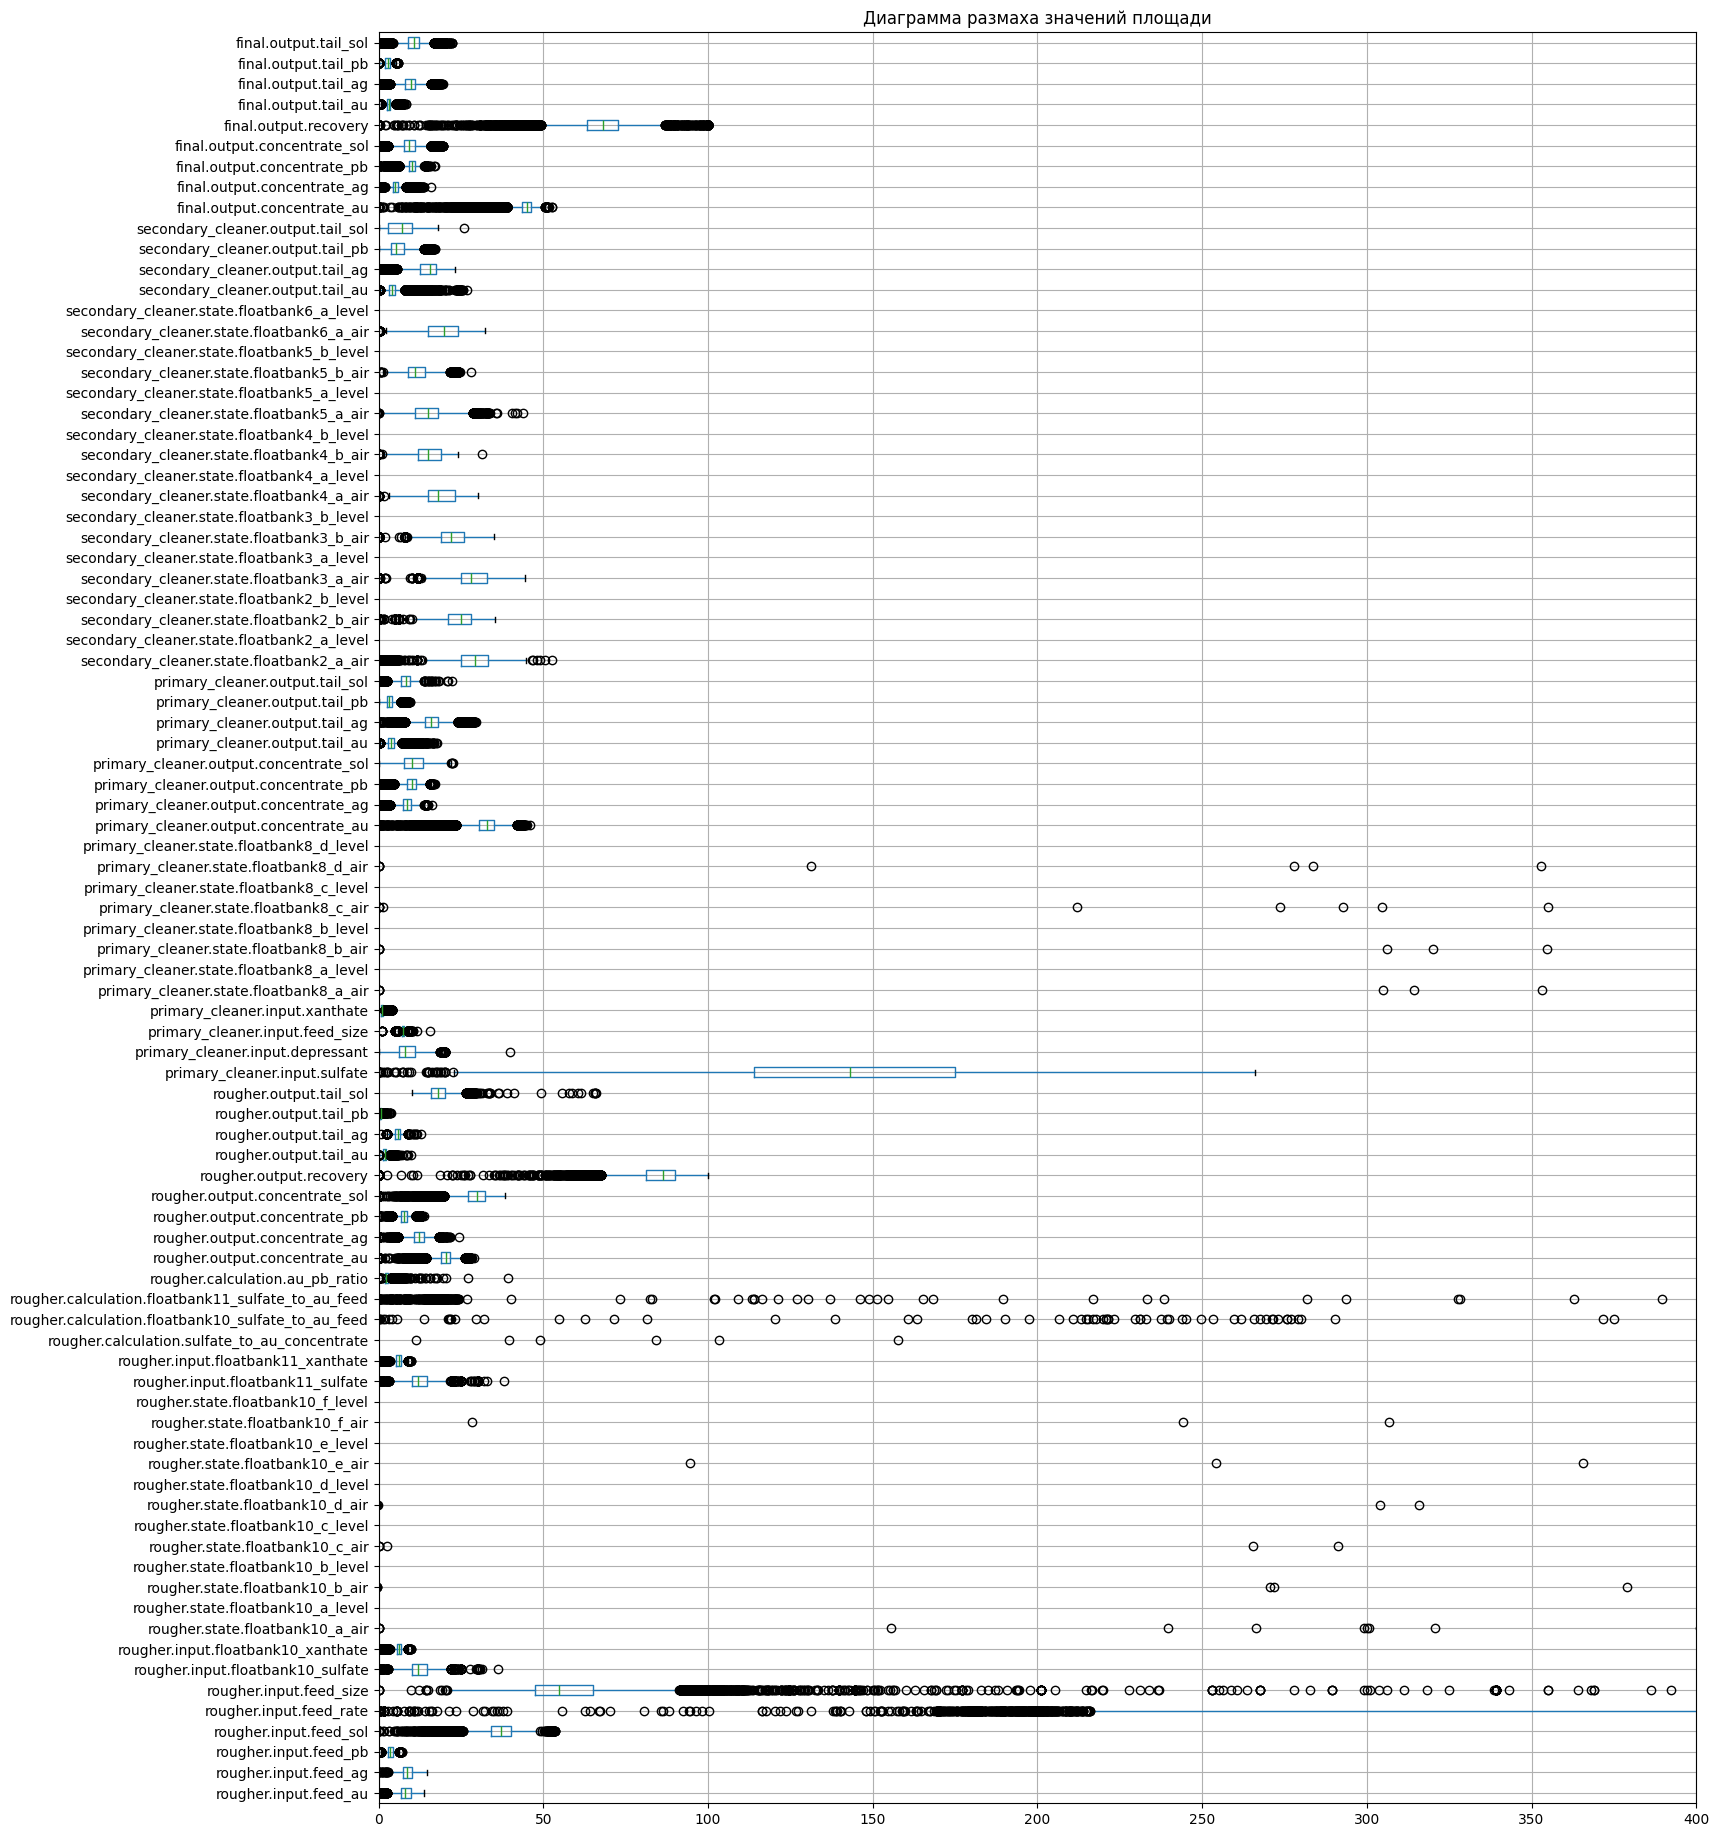

In [7]:
fig, ax = plt.subplots(figsize = (17,23))
ax = df.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400)

(0.0, 400.0)

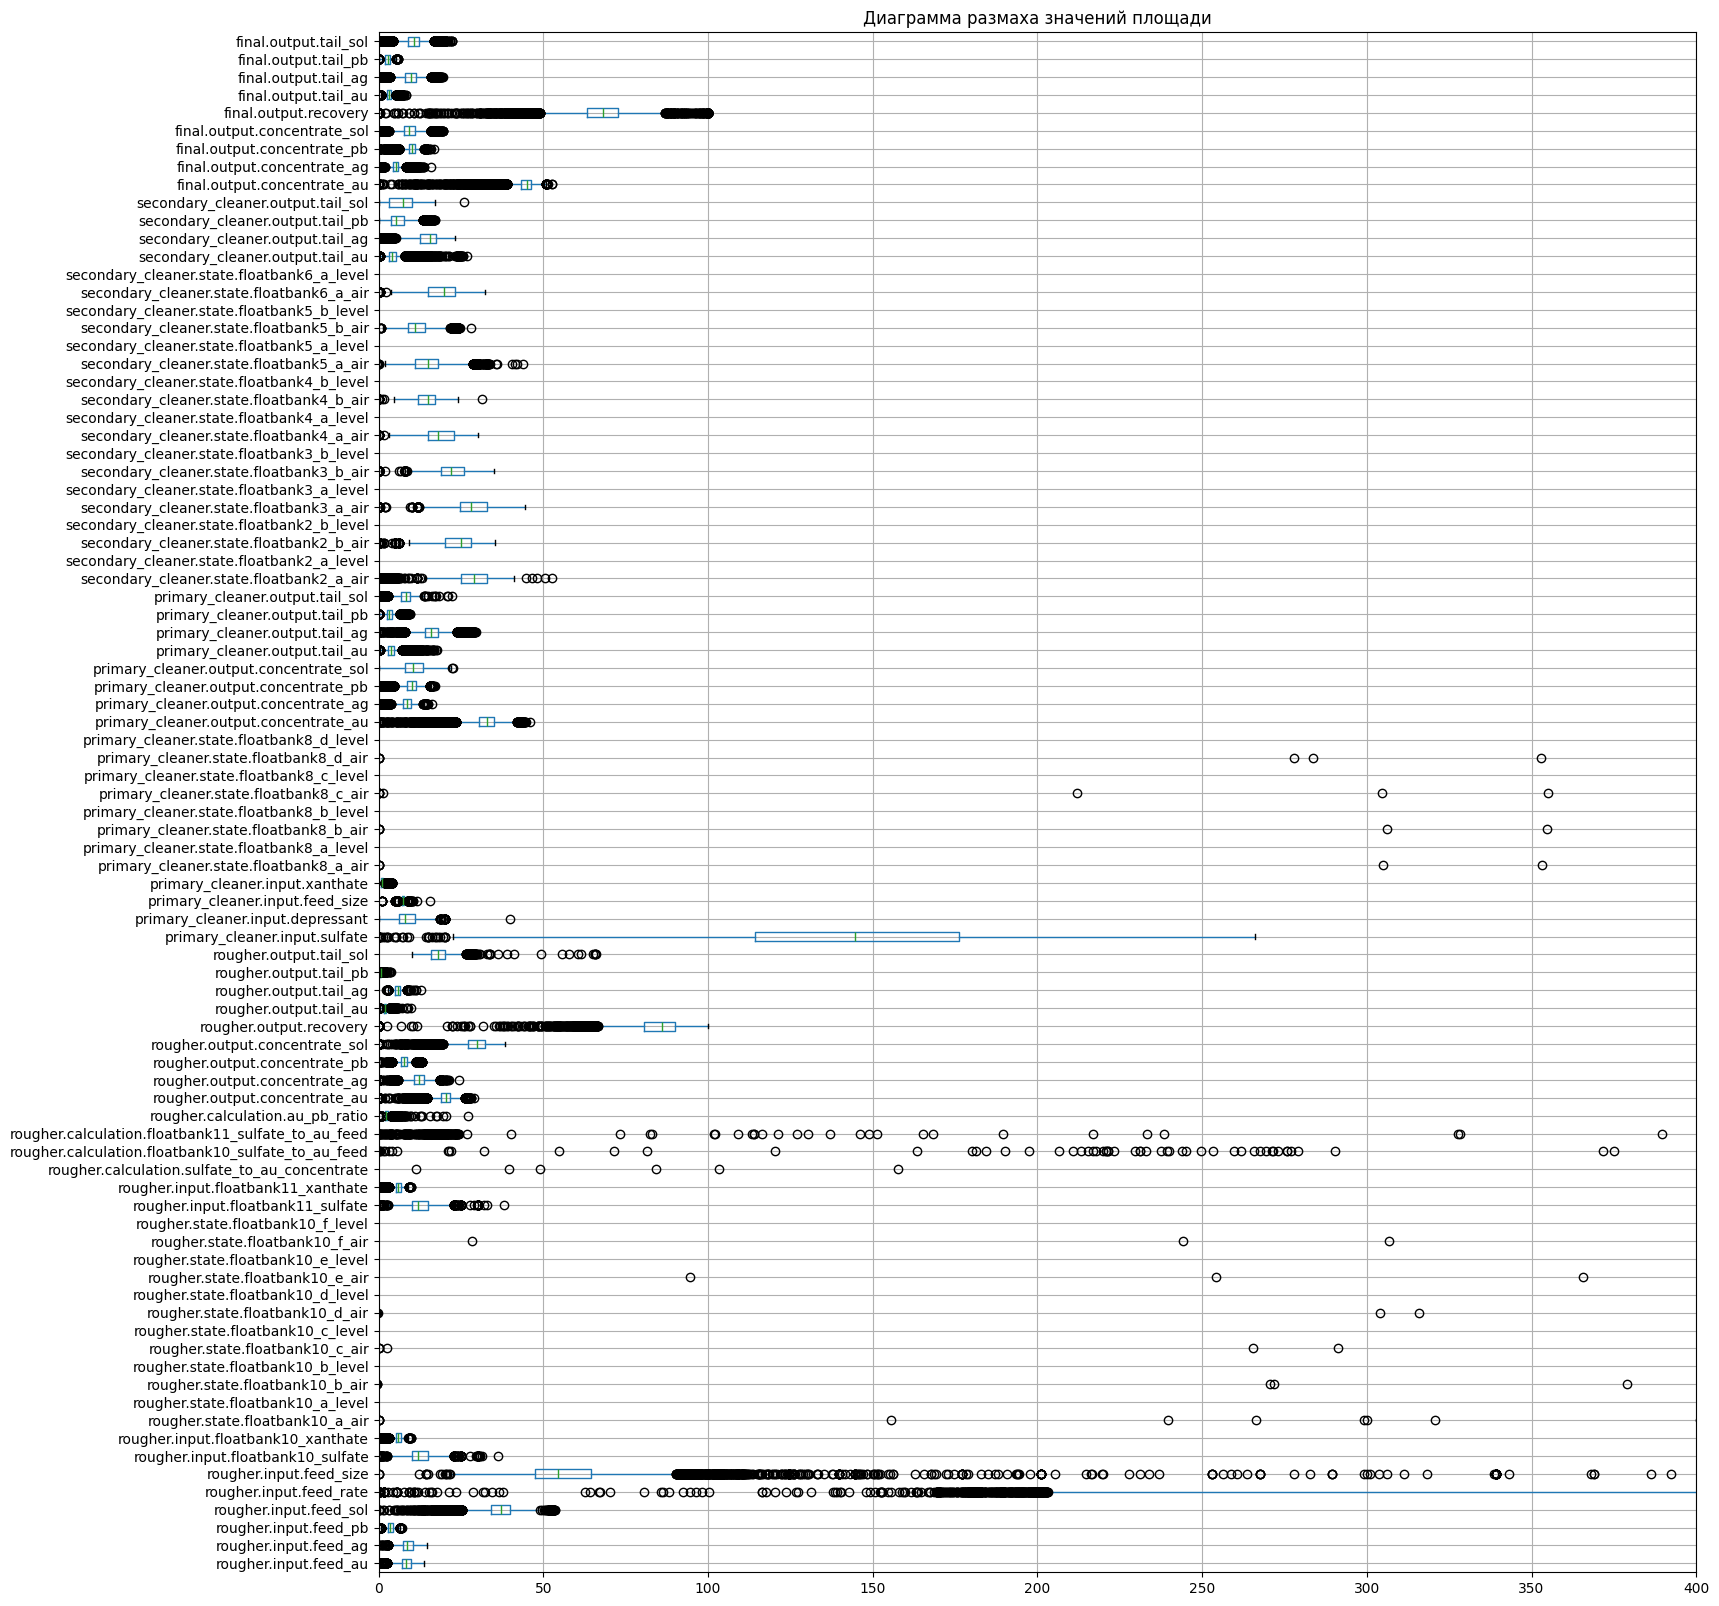

In [8]:
fig, ax = plt.subplots(figsize = (17,20))
ax = dTrain.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400)

(0.0, 400.0)

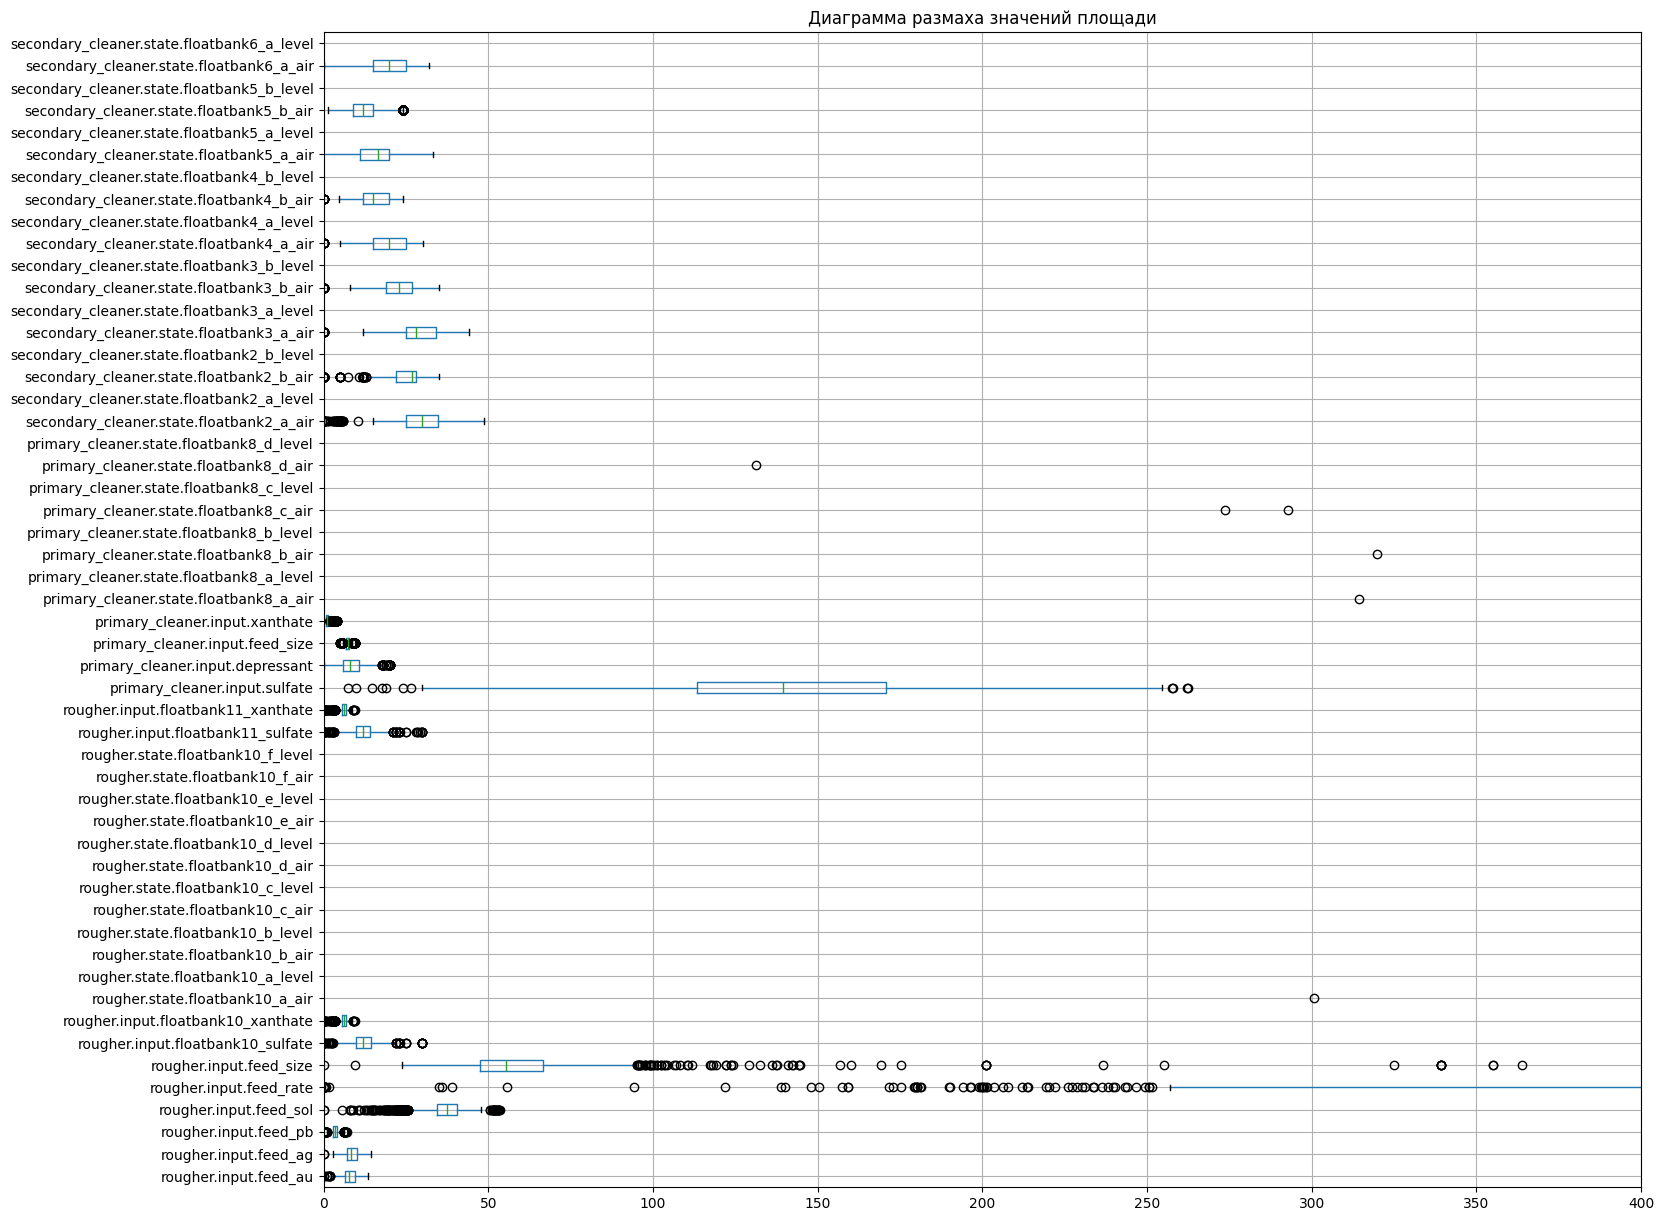

In [9]:
fig, ax = plt.subplots(figsize = (17,15))
ax = dTest.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400)

#### Дубликаты

In [10]:
display(df['date'].duplicated().sum())
display(dTrain['date'].duplicated().sum())
dTest['date'].duplicated().sum()

0

0

0

__По итогам подготовки данных к анализу было обнаружено и сделано следующее:__
+ В датесете присутствуют некоторые пропуски, а также имеется колонка с данными дат объектного типа.
+ При проверке расчетов значение MAE оказалось близким к 0 - это значит, что значения rougher.output.recovery совпадают с моими расчетами эффективности обогащения.
+ В тестовой выборке отсутствуют колонки с параметром продукта - output, так как это целевые признаки, а также расчетных характеристик.
+ Заполнены пропуски во всех трех датасетах.
+ Выявлены аномалии.
+ Подтверждено отсутствие продублированных строк.

## Анализ данных

### Изменения концетраций металлов на разных стадиях

Далее представлены измененния концентрация металлов золота, серебра и свинца(Au, Ag, Pb) на различных этапах:
+ в исходном сырье - rougher.input.feed_x __(здесь и далее х - химический элемент)__
+ в черновом концентрате - rougher.output.concentrate_x
+ в концентрате после первой очистки - primary_cleaner.output.concentrate_x
+ в финальном концентрате - final.output.concentrate_x

In [11]:
def createhist1(x):
    plt.figure(figsize=(14,7))
    
    plt.hist(dTrain[f'rougher.input.feed_{x}'], alpha=0.7, label='исходное сырье', color='black', bins = 250)
    plt.hist(dTrain[f'rougher.output.concentrate_{x}'], alpha=0.4, label='черновой концентрат', color='darkorchid', bins = 250)
    plt.hist(dTrain[f'primary_cleaner.output.concentrate_{x}'], alpha=0.4, label='первая очистка', color='navy', bins = 250)
    plt.hist(dTrain[f'final.output.concentrate_{x}'], alpha=0.7, label='финальный концентрат', color='wheat', bins = 250)

    plt.legend() 
    plt.title(f"Поэтапные изменения концентрации металла {x}")
    plt.xlabel("Значения концетрации")
    plt.ylabel("Количество значений концентрации")
    plt.grid() 

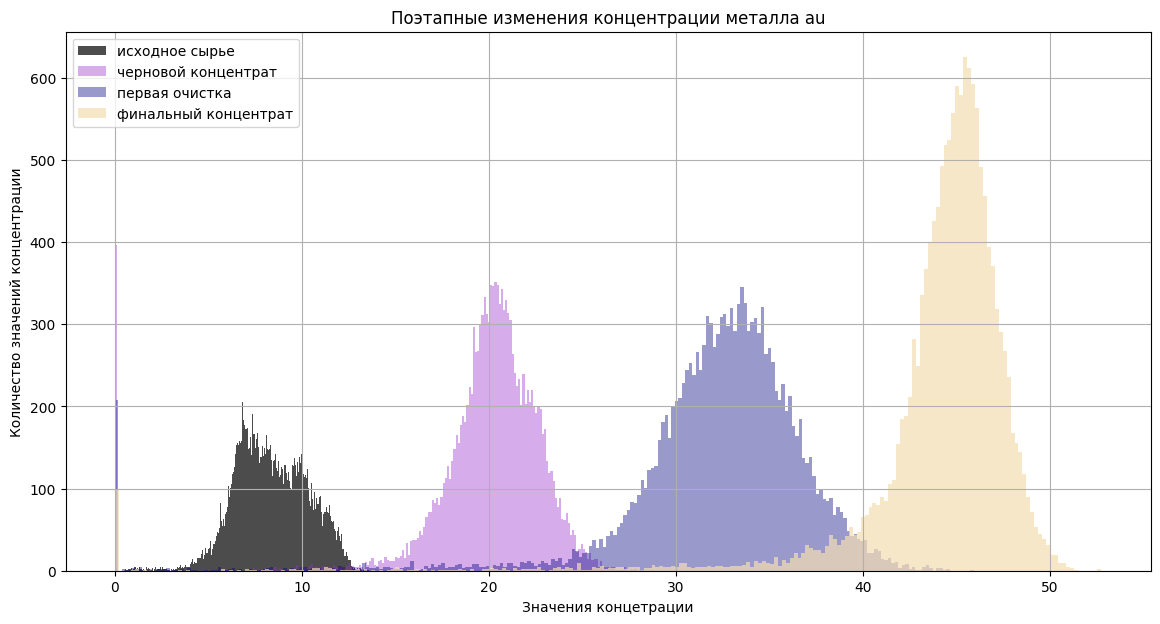

In [12]:
createhist1('au')

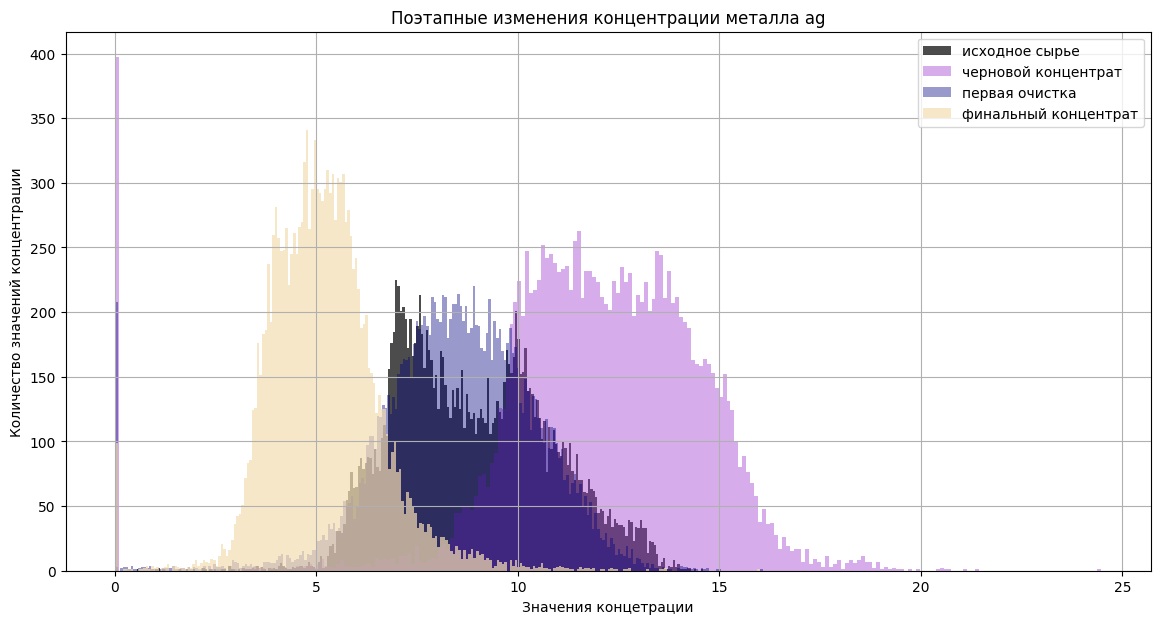

In [13]:
createhist1('ag')

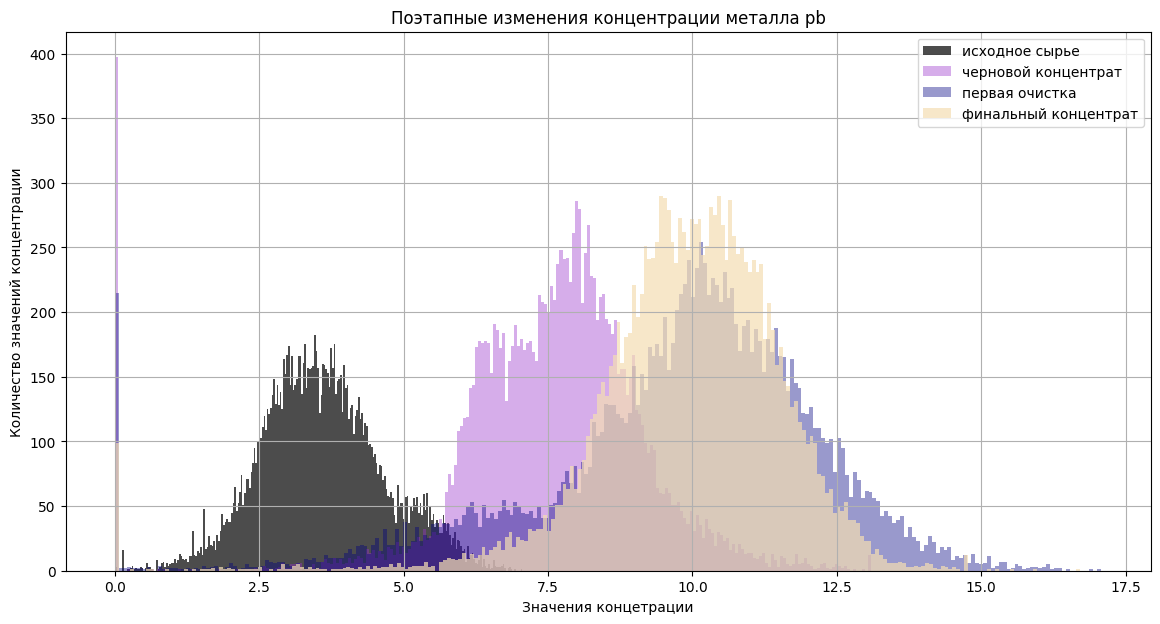

In [14]:
createhist1('pb')

__Технологический процесс предприятия ориентирован на получение золота из руды, графики подтверждают это. В финальном концентрате количество золота доходит до 600 ед. при концентрации равной 45, в то время как остальные элементы не доходят до 350 в разные этапы очистки при концентрации меньше в 3 раза. А также на графиках обнаружены аномалии концентраций стремящихся к 0 на разных этапах очистки, для корректного обучения модели такие аномалии необходимо удалить.__

In [15]:
columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',\
           'final.output.concentrate_au','rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
           'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'rougher.input.feed_pb',\
           'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

for col in columns:
    dTrain = dTrain[dTrain[col] > 1]

### Сравнение размеров гранул исходного сырья на обучающей и тестовой выборке

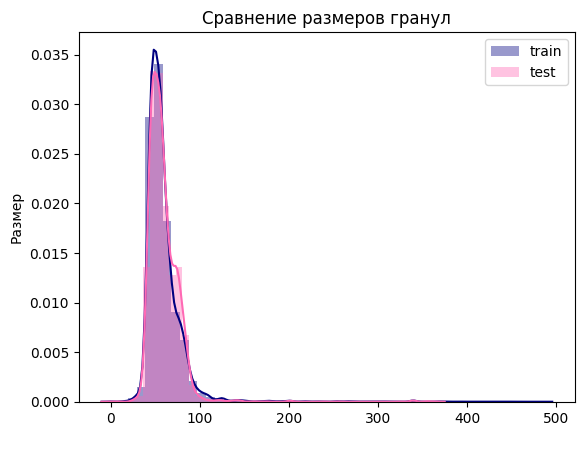

In [16]:
sns.distplot(dTrain['rougher.input.feed_size'],label='train', color='navy')
sns.distplot(dTest['rougher.input.feed_size'], label='test', color = 'hotpink')
plt.legend()
plt.title('Сравнение размеров гранул')
plt.xlabel(' ')
plt.ylabel('Размер')
plt.show()

Размеры гранул в обеих выборках достаточно схожи.

### Суммарная концентрация металлов на разных стадиях

In [17]:
rougher_input= df['rougher.input.feed_au'\
                 ] + df['rougher.input.feed_ag'\
                       ] + df['rougher.input.feed_pb'\
                             ]+ df['rougher.input.feed_sol']

rougher_output = df['rougher.output.concentrate_au'\
                   ]+df['rougher.output.concentrate_ag'\
                       ]+df['rougher.output.concentrate_pb'\
                           ]+df['rougher.output.concentrate_sol']

primary_cleaner_output = df['primary_cleaner.output.concentrate_au'\
                           ]+df['primary_cleaner.output.concentrate_ag'\
                               ]+df['primary_cleaner.output.concentrate_pb'\
                                   ]+df['primary_cleaner.output.concentrate_sol']

final_output = df['final.output.concentrate_au'\
                 ]+df['final.output.concentrate_ag'\
                     ]+df['final.output.concentrate_pb'\
                         ]+df['final.output.concentrate_sol']


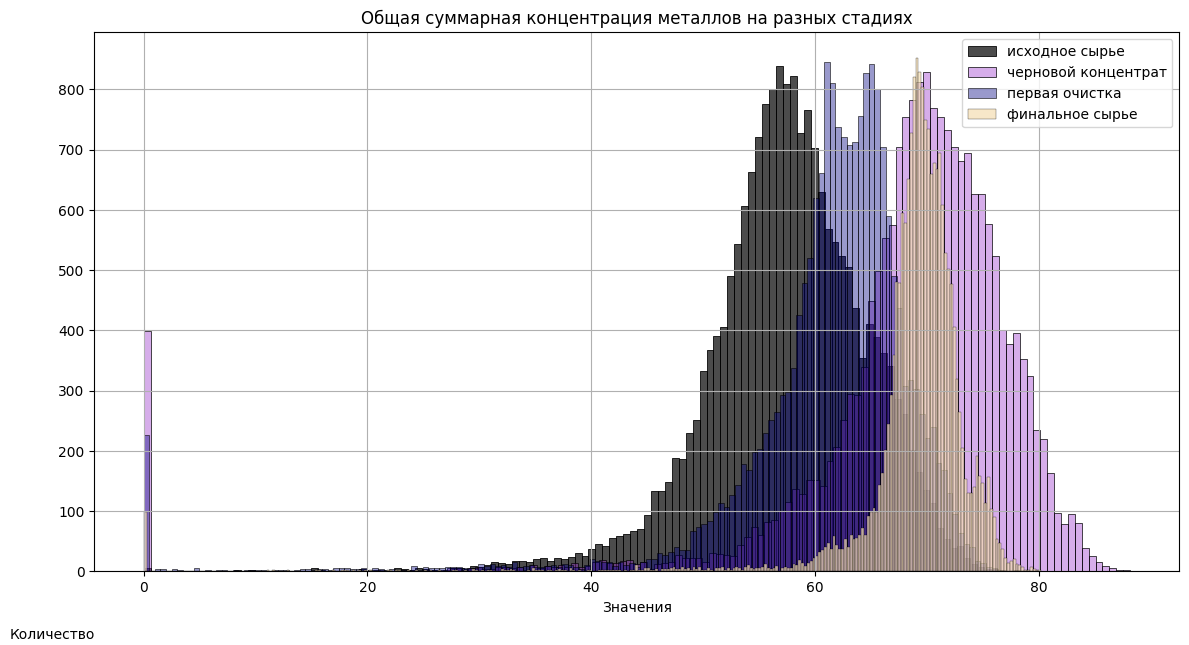

In [18]:
plt.figure(figsize=(14,7))

sns.histplot(rougher_input, color = 'black', label = 'исходное сырье', alpha = 0.7)
sns.histplot(rougher_output, color = 'darkorchid', label = 'черновой концентрат', alpha = 0.4)
sns.histplot(primary_cleaner_output, color = 'navy', label = 'первая очистка', alpha = 0.4)
sns.histplot(final_output, color = 'wheat', label = 'финальное сырье', alpha = 0.7)

plt.legend() 
plt.title('Общая суммарная концентрация металлов на разных стадиях')
plt.xlabel('Значения')
plt.ylabel('Количество', rotation = 0, y = -0.13)
plt.grid() 

In [19]:
columns = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol',\
           'primary_cleaner.output.concentrate_sol','final.output.concentrate_sol'] 
                                                   
for col in columns:
    dTrain = dTrain[dTrain[col] > 1]

__По итогам анализа данных было обнаружено и сделано следующее:__
+ Технологический процесс предприятия ориентирован на получение золота из руды
+ В финальном концентрате количество золота доходит до 600 ед. при концентрации равной 45, в то время как остальные элементы не доходят до 350 в разные этапы очистки при концентрации меньше в 3 раза
+ Размеры гранул в обучающей и тестовой выборках совпали
+ Концентрация золота от руды до последнего этапа обработки увеличивается в почти 6 раз, показатели серебра изменились незначительно, а концентрация свинца оказалась вдвое больше от исходного в финальном сырье
+ Были удалены некоторые аномальные значения из обучающей выборки

## Построение модели

#### Описание функции sMAPE

In [20]:
def call_sMape(target, predict):
    if len(target)!=len(predict):
        return "ERROR foo sMape of lenght lists"
        
    else:
        return ((np.sum(abs(target-predict)/((abs(target)+abs(predict))/2)))/len(target))*100

#### Описание итоговой функции sMAPE

In [21]:
def f_sMape(rougher, final):
    return (0.25*rougher+0.75*final).mean()

#### Подготовка данных к обучению моделей

In [22]:
col = dTest.columns 
features = dTrain[col] 
features = features.drop(columns=['date']) 
targetR = dTrain['rougher.output.recovery']
targetF = dTrain['final.output.recovery']

### Линейная регрессия

In [23]:
lnR = LinearRegression() 
lnF = LinearRegression()

In [24]:
lnR.fit(features, targetR)
lnF.fit(features, targetF)

LinearRegression()

In [25]:
scoresR = cross_val_score(lnR, features, targetR, scoring = make_scorer(call_sMape), cv=5)
scoresF = cross_val_score(lnF, features, targetF, scoring = make_scorer(call_sMape), cv=5)

In [26]:
print("sMape чернового концентрата: {0:.2f}%".format(scoresR.mean()))
print("sMape финального концентрата: {0:.2f}%".format(scoresR.mean()))
print("Final sMape: {0:.2f}%".format(f_sMape(scoresR,scoresF)))

sMape чернового концентрата: 7.01%
sMape финального концентрата: 7.01%
Final sMape: 8.72%


__По итогам обучения линейной регрессии, финальное значение sMape равно - 8.72, модель предсказала значения эффективности концентратов с точностью в 7.01 и 7.01, что говорит о том, что модель довольно точна в своих предсказаниях.__

### РиджСВ

In [27]:
hyperparameters4 = {'fit_intercept': [True],
                   'gcv_mode': ['svd']}
ridgeR = GridSearchCV(RidgeCV(), hyperparameters4, n_jobs=-1, scoring=make_scorer(call_sMape), cv=5)
ridgeF = GridSearchCV(RidgeCV(), hyperparameters4, n_jobs=-1, scoring=make_scorer(call_sMape), cv=5)

ridgeR.fit(features, targetR)
ridgeF.fit(features, targetF)
best_ridgeR = ridgeR.best_estimator_
best_ridgeF = ridgeF.best_estimator_

In [28]:
scoresR1 = cross_val_score(best_ridgeR, features, targetR,\
                           scoring = make_scorer(call_sMape), cv=5)
scoresF1 = cross_val_score(best_ridgeF, features, targetF, \
                           scoring = make_scorer(call_sMape), cv=5)

In [29]:
print("sMape чернового концентрата: {0:.2f}%".format(scoresR1.mean()))
print("sMape финального концентрата: {0:.2f}%".format(scoresF1.mean()))
print("Final sMape: {0:.2f}%".format(f_sMape(scoresR1,scoresF1)))

sMape чернового концентрата: 7.00%
sMape финального концентрата: 9.28%
Final sMape: 8.71%


### Тест лучшей модели

Сравнение результатов с константной.

In [30]:
dummyR = DummyRegressor(strategy="mean")
dummyF = DummyRegressor(strategy="mean")

dummyR.fit(features, targetR)
dummyF.fit(features, targetF)

DummyRegressor()

In [31]:
dTest = dTest.drop(['date'], axis = 1)

In [32]:
predforR = best_ridgeR.predict(dTest)
predforF = best_ridgeF.predict(dTest)

In [33]:
pred_dR = dummyR.predict(dTest)
pred_dF = dummyF.predict(dTest)

Final sMape GradientRegressor: 71.63%
Final sMape ConstModel: 71.86%


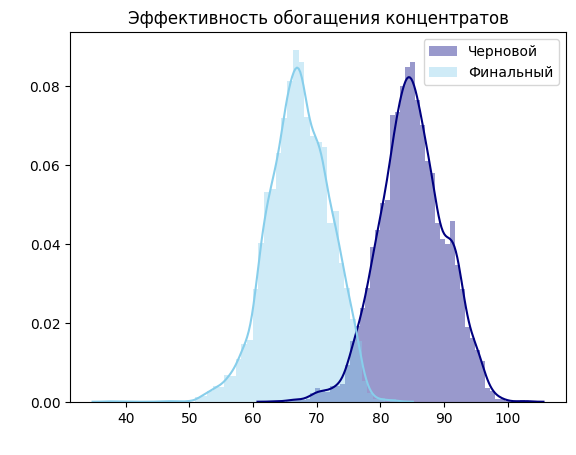

In [34]:
print("Final sMape RidgeCV: {0:.2f}%".format(f_sMape(predforR,predforF)))
print("Final sMape ConstModel: {0:.2f}%".format(f_sMape(pred_dR,pred_dF)))

sns.distplot(predforR,label='Черновой', color='navy')
sns.distplot(predforF, label='Финальный', color = 'skyblue')

plt.legend()
plt.title('Эффективность обогащения концентратов')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

__На тестовых данных модель отразила итоговую sMape - 71.68, что на 0.18 лучше константной модели. По графику можно сказать, что обогащение чернового концентрата эффективнее финального на 30%.__

# Вывод

__В ходе работы были изучены данные, проведены расчеты проверки эффективности обогащения концентратов, предобработаны данные. А также проведен анализ данных, при котором обнаружено, что в финальном концентрате количество золота доходит до 600 ед. при концентрации равной 45, в то время как остальные элементы не доходят до 350 в разные этапы очистки при концентрации меньше в 3 раза, размеры гранул в обучающей и тестовой выборках совпали, концентрация золота от руды до последнего этапа обработки увеличивается в почти 6 раз, показатели серебра изменились незначительно, а концентрация свинца оказалась вдвое больше от исходного в финальном сырье. Затем были обучены три модели для получения предсказаний двух величин: эффективности обогащения чернового концентрата и эффективности обогащения финального концентрата. Для осуществления предсказаний на тестовых данных, была выбрана модель градиентного регресора, у которой значение итоговой sMape составило 8.19%. По итоговому графику видно, что модель  регрессии считает, что обогащение чернового концентрата эффективнее на 30% чем обогащение финального.__

